In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

In [2]:
import gym
import gym_basic_nav

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

/Users/user/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def show_state(env, envb, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Nav-Env",step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [4]:
envb = gym.make('continuous-nav-v0')
env = DummyVecEnv([lambda: envb])

model = PPO2(MlpPolicy, env, n_steps=512, ent_coef=0.01, verbose=1)
model.learn(total_timesteps=10000)


------------------------------------
| approxkl           | 0.002904423 |
| clipfrac           | 0.028320312 |
| ep_rewmean         | nan         |
| eplenmean          | nan         |
| explained_variance | 6.79e-05    |
| fps                | 593         |
| nupdates           | 1           |
| policy_entropy     | 5.677401    |
| policy_loss        | -0.01171256 |
| serial_timesteps   | 512         |
| time_elapsed       | 1.91e-06    |
| total_timesteps    | 528         |
| value_loss         | 4675.786    |
------------------------------------
-------------------------------------
| approxkl           | 0.0035722726 |
| clipfrac           | 0.041015625  |
| ep_rewmean         | nan          |
| eplenmean          | nan          |
| explained_variance | -0.00196     |
| fps                | 873          |
| nupdates           | 2            |
| policy_entropy     | 5.6819077    |
| policy_loss        | -0.013026531 |
| serial_timesteps   | 1024         |
| time_elapsed       | 0.86

--------------------------------------
| approxkl           | 0.00025923294 |
| clipfrac           | 0.0           |
| ep_rewmean         | nan           |
| eplenmean          | nan           |
| explained_variance | -0.00631      |
| fps                | 419           |
| nupdates           | 16            |
| policy_entropy     | 5.6611586     |
| policy_loss        | -0.0009876189 |
| serial_timesteps   | 8192          |
| time_elapsed       | 13.7          |
| total_timesteps    | 8448          |
| value_loss         | 347.92267     |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008484818  |
| clipfrac           | 0.0024414062  |
| ep_rewmean         | nan           |
| eplenmean          | nan           |
| explained_variance | 0.00782       |
| fps                | 534           |
| nupdates           | 17            |
| policy_entropy     | 5.66163       |
| policy_loss        | -0.0037489294 |
| serial_timesteps   | 87

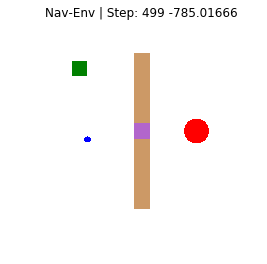

COMPLETE

[array([ 53.073265, 221.81505 ], dtype=float32), array([ 75.48266, 274.33176], dtype=float32), array([ 13.108813, 312.36322 ], dtype=float32), array([ 13.108813, 312.36322 ], dtype=float32), array([ 32.159805, 312.36322 ], dtype=float32), array([127.28803, 317.4755 ], dtype=float32), array([ 90.589966, 359.98553 ], dtype=float32), array([ 61.02116, 347.1762 ], dtype=float32), array([ 61.02116, 347.1762 ], dtype=float32), array([ 65.90429, 372.4187 ], dtype=float32)]
Total: -785



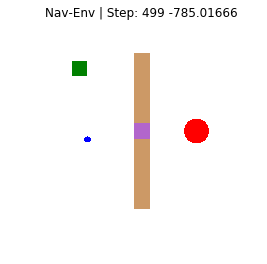

In [9]:
init_obs = env.reset()
obs = init_obs.copy()
reward = 0
actions = 0*env.action_space.sample()
states = []
for i in range(500):
    action, _states = model.predict(obs)
    actions += action.squeeze()
    obs, rewards, dones, info = env.step(action)
    reward += rewards
    states.append(obs[0,:2])
    show_state(env, envb, step=i, info=str(reward[0]))
    # print("Reward: %d" % rewards)
    # print("Total: %d\n" % reward)

    if dones:
        print("COMPLETE\n")
        break

print(states[:10])
print("Total: %d\n" % reward)
# env.render(close=True)

In [ ]:
print(env.reset())

In [ ]:
actions/500

In [7]:
env.render(close=True)